<a href="https://colab.research.google.com/github/raghavvv/colab_notebooks/blob/main/semantic_chunking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade pytube
#!pip install git+https://github.com/openai/whisper.git -q
!pip install youtube-dl
!pip install assemblyai
!pip install librosa
!pip install jiwer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 905.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.3/68.3 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 21.0 MB/s eta 0:00:00


In [ ]:
import assemblyai as aai
from pytube import YouTube
import youtube_dl
import jiwer
from sklearn.metrics import precision_score, recall_score, f1_score
import re
import librosa
import numpy as np


In [ ]:
video_url = 'https://www.youtube.com/watch?v=Sby1uJ_NFIY'
#a possible error you may encounter is because of pytube and you may get an AttributeError, so run this cell multiple times and you shall breakthrough some tim
yt = YouTube(video_url)
video = yt.streams.filter(only_audio=True).first()
video.download('/content')

'/content/Sarvam AI Wants To Leverage AI In Health & Education Says Co Founder Vivek Raghavan With OpenHathi.mp4'

# My Reasons for Using Assembly AI

I chose AssemblyAI over other libraries like OpenAI Whisper for the following reasons

1. AssemblyAI is designed to handle large volumes of transcription requests, making it suitable for applications that require high throughput.
2. AssemblyAI is trained on large datasets, also being finetuned to handle a wider array of languages with ease.
3. While Whisper may offer higher customisability, AssemblyAI offers a more user-friendly API, higher accuracy levels, real-time transcription capabilities and scalability as well for large-scale project.
4. Librosa may be a good choice for feature manipulation and extraction in audio, but AssemblyAI does provide a more reliable system when it comes to transcription.

In [ ]:
aai.settings.api_key = "e36151f3056f491fbde2d5e7ee100cfa" #this is my API key i obtained from the assembly AI site

FILE_URL = "/content/Sarvam AI Wants To Leverage AI In Health & Education Says Co Founder Vivek Raghavan With OpenHathi.mp4"

#this transcribes all the audio into text (speech-to-text)
transcriber = aai.Transcriber()
transcript = transcriber.transcribe(FILE_URL)

In [ ]:
audio, sr = librosa.load("/content/Sarvam AI Wants To Leverage AI In Health & Education Says Co Founder Vivek Raghavan With OpenHathi.mp4")

#calculating the duration of the audio in seconds
duration = librosa.get_duration(path="/content/Sarvam AI Wants To Leverage AI In Health & Education Says Co Founder Vivek Raghavan With OpenHathi.mp4")

#as initialised in the previous cell, we use the transcript object to extract a list of all words present
words = transcript.words

#store the start and end times of each word in an empty list
word_times = []

#iterate over each word in the words list, extract the 'start' and 'end' timestamps of each word
for word in words:
  start_time = word.start
  end_time = word.end

  #to convert time into seconds since the initial timestamps are in milliseconds
  start_time_seconds = start_time / 1000
  end_time_seconds = end_time / 1000

  word_times.append([start_time_seconds, end_time_seconds])

#convert the list of word times to a numpy array
word_times = np.array(word_times)

#print the whole array to observe the nature of timestamps
print(word_times)


<ipython-input-7-8a3fe9450839>:1: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load("/content/Sarvam AI Wants To Leverage AI In Health & Education Says Co Founder Vivek Raghavan With OpenHathi.mp4")
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


[[2.400000e-01 8.720000e-01]
 [8.720000e-01 9.840000e-01]
 [9.840000e-01 1.088000e+00]
 ...
 [1.574006e+03 1.574174e+03]
 [1.574214e+03 1.574798e+03]
 [1.574846e+03 1.574934e+03]]


<ipython-input-7-8a3fe9450839>:4: FutureWarning: PySoundFile failed. Trying audioread instead.
	Audioread support is deprecated in librosa 0.10.0 and will be removed in version 1.0.
  duration = librosa.get_duration(path="/content/Sarvam AI Wants To Leverage AI In Health & Education Says Co Founder Vivek Raghavan With OpenHathi.mp4")


In [ ]:
#calculate the Word Error Rate (WER) using the 'jiwer' library by comparing a reference transcript with an actual transcript
def calculate_wer(reference, hypothesis):
    return jiwer.wer(reference, hypothesis)

#function to calculate the quality of segment based on the length of text
def calculate_segment_quality(text):
    return len(text.split())

#function to evaluate accuracy of start and end timestamps of a segment by comparing the actual and predicted values
def calculate_timestamp_accuracy(pred_start, pred_end, true_start, true_end):
    start_diff = abs(pred_start - true_start)
    end_diff = abs(pred_end - true_end)
    return start_diff, end_diff


#start of the chunking process
current_chunk = []
current_chunk_duration = 0
chunks = []
chunk_id = 1

#calculate the duration of each word based on start and end times
word_durations = word_times[:, 1] - word_times[:, 0]

#loop over the words and their durations
for i, (start_time, end_time) in enumerate(word_times):
  #iterate over words and their durations, andt then proceed to add the words to the current chunk
    word_duration = word_durations[i]
    word_text = transcript.words[i].text

    current_chunk.append((word_text, start_time, end_time))
    current_chunk_duration += word_duration

    #check if the current chunk exceeds 15 seconds
    if current_chunk_duration > 15:

        #remove the last word from the chunk to ensure duration remains at 15 seconds
        #TODO - keep removing until duration is 15
        word_text, start_time, end_time = current_chunk.pop()
        current_chunk_duration -= word_durations[i]

        chunk_text = ' '.join([word[0] for word in current_chunk])
        chunk_start = current_chunk[0][1]
        chunk_end = end_time
        chunk_duration = chunk_end - chunk_start

        #initialise the dictionary for storing all chunks
        chunk_dict = {
            'chunk_id': chunk_id,
            'chunk_length': chunk_duration,
            'text': chunk_text,
            'start_time': chunk_start,
            'end_time': chunk_end
        }

        #append chunks
        chunks.append(chunk_dict)

        #reset variables for the next chunk
        current_chunk = [(word_text, start_time, end_time)]
        current_chunk_duration = word_duration
        chunk_id += 1

if current_chunk:
    chunk_text = ' '.join([word[0] for word in current_chunk])
    chunk_start = current_chunk[0][1]
    chunk_end = current_chunk[-1][2]
    chunk_duration = chunk_end - chunk_start

    chunk_dict = {
        'chunk_id': chunk_id,
        'chunk_length': chunk_duration,
        'text': chunk_text,
        'start_time': chunk_start,
        'end_time': chunk_end
    }

    chunks.append(chunk_dict)

#print the formatted chunks
for chunk in chunks:
    print(chunk)

{'chunk_id': 1, 'chunk_length': 25.246000000000002, 'text': "Congratulations to you, Mister Raghavan, for that. Thank you so much for joining us. Over to you. Hi, everybody. How are you? Okay. I am not hearing this at all. It's like a post lunch energy downer or something. Let's hear it. Are you guys awake? All right, you better be because", 'start_time': 0.24, 'end_time': 25.486}
{'chunk_id': 2, 'chunk_length': 20.426, 'text': "we have a superstar guest here. You heard the $41 million. And I didn't hear, honestly anything she said after that. So we're going to ask for about $40 million from him by the end of this conversation. Okay? But let's get started. I want to introduce Zvek and Pratyush, his co founder, who's not", 'start_time': 25.054, 'end_time': 45.48}
{'chunk_id': 3, 'chunk_length': 19.024, 'text': 'here. We wanted to start with playing a video of what Openhati does. I encourage all of you to go to the website Savrom AI and check it out. But let me start by introducing Vivek

In [ ]:
segment_quality_scores = []
timestamp_accuracy_scores = []

#iterate over all chunks
for chunk in chunks:
  #calculate the segment quality by counting the number of words in the chunk text and append the score to the empty list initialised above
    segment_quality = len(chunk["text"].split())
    segment_quality_scores.append(segment_quality)

  #calculate the timestamop accuracy here by comparing the start time of the current chunk to the end time of the previous chunk
    if len(chunks) > 1:
        for i in range(1, len(chunks)):
            prev_chunk = chunks[i - 1]
            current_chunk = chunks[i]
            start_diff = abs(current_chunk["start_time"] - prev_chunk["end_time"])
            timestamp_accuracy_scores.append(start_diff)

#calculate the mean of all scores
avg_segment_quality = np.mean(segment_quality_scores)
avg_timestamp_accuracy = np.mean(timestamp_accuracy_scores) if timestamp_accuracy_scores else 0

print(f"Average Segment Quality: {avg_segment_quality}")
print(f"Average Timestamp Accuracy: {avg_timestamp_accuracy}")

complete_sentences = 0
for chunk in chunks:
    if re.search(r'[.!?]$', chunk["text"].strip()):
        complete_sentences += 1

percentage_complete_sentences = (complete_sentences / len(chunks)) * 100
print(f"Percentage of chunks ending with a complete sentence: {percentage_complete_sentences}%")

Average Segment Quality: 54.404761904761905
Average Timestamp Accuracy: 0.40240963855421624
Percentage of chunks ending with a complete sentence: 13.095238095238097%


In [ ]:
!pip install google-colab-selenium
!pip install pydub
!pip install soundfile

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.7/467.7 kB 35.9 MB/s eta 0:00:00


In [ ]:
import google_colab_selenium as gs
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import os
import urllib.parse
import time
import pandas as pd
import io
from pydub import AudioSegment
import soundfile as sf

In [ ]:
#make a request to the webpage
url = "https://live.bible.is/bible/HINBIB/"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

In [ ]:
#initialised webdriver
#driver = webdriver.Chrome() for conventional Jupyter notebooks, i have used GS since it has all settings and options already programmed
driver = gs.Chrome()

#tgis is Hindi Biblica Open Hindi Commentary Version of the Hindi book of the bible
#I fetched this after going to the Recordings Database - https://www.faithcomesbyhearing.com/audio-bible-resources/recordings-database
url = "https://live.bible.is/bible/HINBIB/"
driver.get(url)

#sometimes the URL does not respond to the request and may throw a blank page, which may lead to the program not running

#simulate a click on the dropdown button to expand the menu
dropdown_button = driver.find_element(By.ID, "chapter-dropdown-button")
dropdown_button.click()

#find the dropdown button where all the books and chapters are displayed, and wait 30 seconds to ensure the dropdown button has been clicked
#since this was a responsive website, some information was displayed after clicking a button or link
try:
    dropdown_menu_expanded = WebDriverWait(driver, 30).until(
        EC.presence_of_element_located((By.CLASS_NAME, "chapter-text-dropdown"))
    )
    print("Dropdown menu is expanded.")
except TimeoutError:
    print("Timeout waiting for dropdown menu to expand.")
    driver.quit()
    exit()

#parse through the updated HTML content after the dropdown menu has expanded
updated_html_content = driver.page_source
updated_soup = BeautifulSoup(updated_html_content, "html.parser")

#make one directory to store all the text extracted
directory = "bible_text"
os.makedirs(directory, exist_ok=True)

#make another directory to store the audio of the respective chapters
audio_directory = "bible_audio"
os.makedirs(audio_directory, exist_ok=True)

chapter_data = []

#locate the "New Testament" section present in the webpage, find the 'div' where it is located
testament_titles = updated_soup.find_all('div', class_='testament-title')
new_testament_div = None
for title in testament_titles:
    if 'New Testament' in title.text:
        new_testament_div = title
        break

#if the new testament section is found, proceed further with the code
if new_testament_div:
    print("New Testament section found.")

    #there was another 'div' called book-buttons right below the new testament section so i had to acces that button
    #find the book buttons after the "New Testament" div

    book_buttons = new_testament_div.find_next_siblings('div', class_='book-button')

 #iterate through all 'book-button' divs present in the "New Testament" section
    for book_button in book_buttons:

        #check for the presence of the 'id' attribute in the 'book-button' div
        if 'id' in book_button.attrs:
          #the book ID was unique in the sense that the last 3 letters in the ID of the 'book-button' div were the same letters present in the URL as well
            book_id = book_button['id'][-3:]

            #inside the 'book-button' div there were many <a> tags which consisted of the links to the chapters in the book
            chapter_links = book_button.find_all('a', class_='chapter-box')

            #iterate through all chapters present in a book
            for chapter_link in chapter_links:
                chapter_number = chapter_link.text.strip()

                #this is the pattern followed by all the books
                #go to the respective URL of each chapter
                chapter_url = f"https://live.bible.is/bible/HINBIB/{book_id}/{chapter_number}"

                #retrieve the chapter text
                chapter_response = requests.get(chapter_url)
                chapter_text = chapter_response.text

                #store the downloaded chapter text in a directory
                text_file_path = os.path.join(directory, f"chapter_{book_id}_{chapter_number}.html")
                with open(text_file_path, "w", encoding="utf-8") as f:
                    f.write(chapter_text)
                    print(f"Chapter {chapter_number} of book {book_id} downloaded and stored.")

               #similarly try and download the audio by finding the appropriate <div> which consisted the link of the audio file
               #find and download the audio file for the chapter
                chapter_soup = BeautifulSoup(chapter_text, "html.parser")

                #find the <video> tag and inside that tag find the 'src' strribute since it consisted of the URL of the audio
                #one catch here was that after inspecting the source code of this page i found out that the 'src' attribute consisted the link in the format "https://live.bible.is/bible/HINBIB/{book_id}/{chapter_number}"
                #initially the 'src' attribute looked only like this - '_' in the source but on further inspection it was a clickable link in the above pattern
                #after all that was figured out, i extracted the respective audio as well for each chapter in the '.wav' format
                audio_link_tag = chapter_soup.find('video', class_='audio-player')
                if audio_link_tag:
                    audio_url = urllib.parse.urljoin(chapter_url,audio_link_tag['src'])
                    audio_response = requests.get(audio_url)
                    audio_path = os.path.join(audio_directory, f"chapter_{book_id}_{chapter_number}.mp3")

                    with open(audio_path, 'wb') as audio_file:
                        audio_file.write(audio_response.content)
                    print(f"Audio for chapter {chapter_number} of book {book_id} downloaded and stored.")
                else:
                    print(f"Audio link for chapter {chapter_number} of book {book_id} not found.")
                    audio_path = None  # Mark as None if no audio found

                #upon further inspection i found out that some of the audio files that got extracted were corrupted and were not recognisable later on, so most of my EDA is done on the text data which is fine

                #append chapter details to the DataFrame list
                chapter_data.append({
                    'book_id': book_id,
                    'chapter_number': chapter_number,
                    'text_file_path': text_file_path,
                    'audio_file_path': audio_path
                })

                time.sleep(2)
else:
    print("New Testament div not found.")

#close the WebDriver
driver.quit()

#create a DataFrame from the collected data
chapters_df = pd.DataFrame(chapter_data)

#save the DataFrame to a CSV file
chapters_df.to_csv('bible_chapters.csv', index=False)

<IPython.core.display.Javascript object>

Dropdown menu is expanded.
New Testament section found.
Chapter 1 of book MAT downloaded and stored.
Audio for chapter 1 of book MAT downloaded and stored.
Chapter 2 of book MAT downloaded and stored.
Audio for chapter 2 of book MAT downloaded and stored.
Chapter 3 of book MAT downloaded and stored.
Audio for chapter 3 of book MAT downloaded and stored.
Chapter 4 of book MAT downloaded and stored.
Audio for chapter 4 of book MAT downloaded and stored.
Chapter 5 of book MAT downloaded and stored.
Audio for chapter 5 of book MAT downloaded and stored.
Chapter 6 of book MAT downloaded and stored.
Audio for chapter 6 of book MAT downloaded and stored.
Chapter 7 of book MAT downloaded and stored.
Audio for chapter 7 of book MAT downloaded and stored.
Chapter 8 of book MAT downloaded and stored.
Audio for chapter 8 of book MAT downloaded and stored.
Chapter 9 of book MAT downloaded and stored.
Audio for chapter 9 of book MAT downloaded and stored.
Chapter 10 of book MAT downloaded and stored

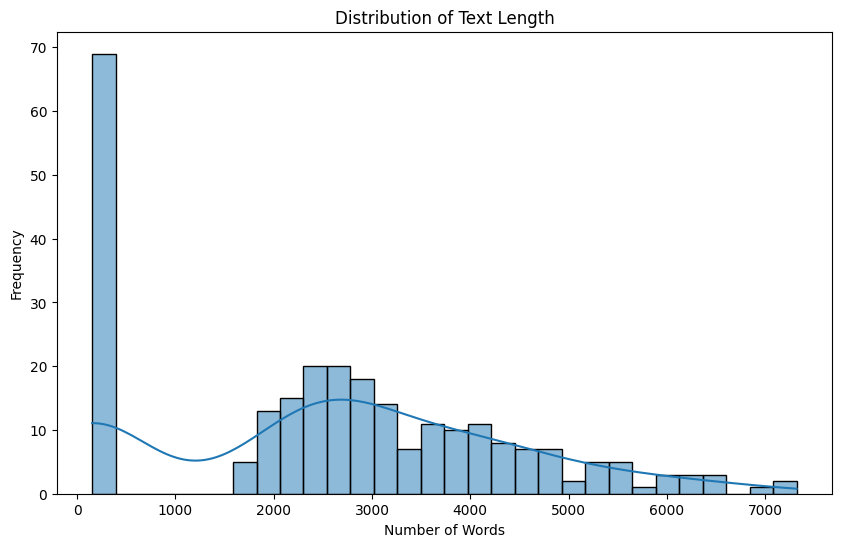

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

#function to calculate text length
def get_text_length(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    return len(text.split())

#add a new column for text length
chapters_df['text_length'] = chapters_df['text_file_path'].apply(get_text_length)

# Plot text length distribution
plt.figure(figsize=(10, 6))
sns.histplot(chapters_df['text_length'], bins=30, kde=True)
plt.title('Distribution of Text Length')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

word frequencies graph

average length of chapters, texts
